In [226]:
%pylab inline
import snrlightcurve_freqparam as snrLC
reload(snrLC)
params = {'axes.linewidth':1.5,'lines.linewidth':1.3,'xtick.labelsize':15,'ytick.labelsize':15,\
          'xtick.major.size':7,'xtick.major.width':2,'ytick.major.size':7,'ytick.major.width':2,\
          'xtick.minor.size':4,'xtick.minor.width':1.5,'ytick.minor.size':4,'ytick.minor.width':1.5}
plt.rcParams.update(params)
plt.rcParams.update({'figure.autolayout': True})

Populating the interactive namespace from numpy and matplotlib


/Users/sumits2k/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


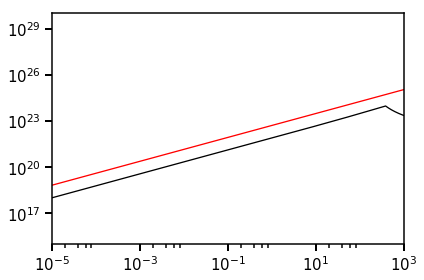

In [3]:
#~~~~~~~~~~~~Scaling Relation~~~~~~~~~~~~#
t = np.logspace(-5, 3, 1000)
lum_t = 5.0e22*(t**.78)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

tim, rad, lum, vel = snrLC.lightcurve_Full(mej=1.4, n0=1., e51=0.5, epse=1.0e-3, pp=2.2, sntype='ia')
plt.plot(tim[np.nonzero(lum)], lum[np.nonzero(lum)], 'k-')
plt.plot(t, lum_t, 'r-')
plt.xscale('log')
plt.xlim(1.0e-5,1000.)
plt.ylim(1.0e15,1.0e30)
plt.yscale('log')
plt.show()

Check $L \sim E^{2.59}$

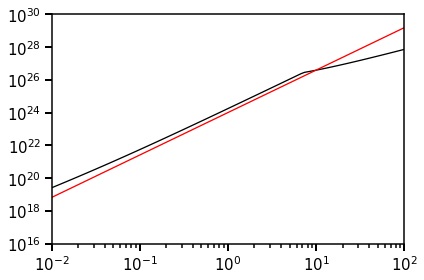

In [183]:
ke_array = np.logspace(-2,2,100)
lum = np.zeros_like(ke_array)
lum_ke = 1.0e24*(ke_array**(2.59))
for i, ke in enumerate(ke_array):
    rad, lum[i], vel = snrLC.lightcurve(n0=1.0, mej=1.4, e51=ke, epse=1.0e-3, pp=2.2, tsnap=100., sntype='ia')
    
plt.plot(ke_array, lum, 'k-')
plt.plot(ke_array, lum_ke, 'r-')
plt.xscale('log')
plt.xlim(0.01,100.)
plt.ylim(1.0e16,1.0e30)
plt.yscale('log')
plt.show()

Checking ejecta mass: $L \sim M_{ej}^{-1.85}$

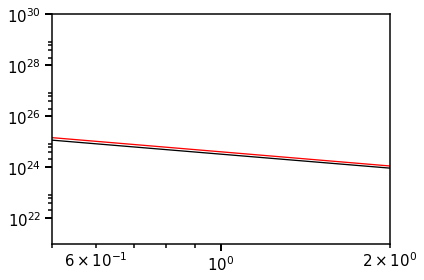

In [6]:
mej_array = np.linspace(0.5,4.,100)
lum = np.zeros_like(mej_array)
lum_mej = 4.0e24*(mej_array**(-1.85))
for i, mej in enumerate(mej_array):
    rad, lum[i], vel = snrLC.lightcurve(n0=1.0, mej=mej, e51=1.0, epse=1.0e-3, pp=2.2, tsnap=100.,\
                                        sntype='ia')
    
plt.plot(mej_array, lum, 'k-')
plt.plot(mej_array, lum_mej, 'r-')
plt.xscale('log')
plt.xlim(0.5,2.0)
plt.ylim(1.0e21,1.0e30)
plt.yscale('log')
plt.show()

Checking $L \sim n_0^{1.06}$

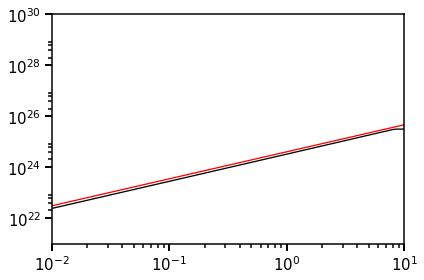

In [7]:
n0_array = np.logspace(-2,1,100)
lum = np.zeros_like(n0_array)
lum_n0 = 4.0e24*(n0_array**(1.06))
for i, n0 in enumerate(n0_array):
    rad, lum[i], vel = snrLC.lightcurve(n0=n0, mej=1.0, e51=1.0, epse=1.0e-3, pp=2.2, tsnap=100.,\
                                        sntype='ia')
    
plt.plot(n0_array, lum, 'k-')
plt.plot(n0_array, lum_n0, 'r-')
plt.xscale('log')
plt.xlim(0.01,10.0)
plt.ylim(1.0e21,1.0e30)
plt.yscale('log')
plt.show()

Finding normalization constant for $L$ expression

In [54]:
rad, lum, vel = snrLC.lightcurve(n0=1.0, mej=1.4, e51=1.0, pp=2.2, epse=1.0e-4, freq=1.4e9, \
                                 tsnap=100., sntype='ia')
def selfsim_lum(n0=1.0, mej=1.0, e51=1.0, pp=2.2, epse=1.0e-3, freq=4.86e9, t=100):
    norm1 = 3.23530381895e+24
    norm2 = 3.24e24
    return norm2*(epse/(1.0e-3))*((t/100.)**0.78)*(e51**2.59)*(mej**(-1.85))*(n0**1.06)*((freq/(1.4e9))**(-0.6))

print lum
print selfsim_lum(n0=1.0, mej=1.4, epse=1.0e-4, freq=1.4e9)

1.75148503663e+23
1.73863390371e+23


In [55]:
rad, lum, vel = snrLC.lightcurve(n0=0.01, mej=0.6, e51=10., pp=2.2, epse=1.0e-4, freq=1.4e9, tsnap=131., sntype='ia')
print lum
print selfsim_lum(n0=0.01, mej=0.6, e51=10., epse=1.0e-4, t=131, freq=1.4e9)

2.89725846432e+24
3.03694416663e+24


I checked the scaling relations by inputting several values of $n_0 = (0.01 - 10)$, $E_{51} = (0.1, 10)$, $t = 131$ yrs, $\epsilon_e = (10^{-4}, 10^{-3})$. The values are basically the same, with a difference of less than 0.1 order of magnitude. I think we can work that for now.

So final expression for luminosity is 

$L_{\nu} \approx \left(3.24\times10^{24}\ \rm{ergs/s}\right) t_2^{0.78} E_{51}^{2.59} M_{ej}^{-1.85} n_0^{1.06} \epsilon_{e,-3}\nu_{1.4}$

## Check Radius  Scalings


$R_s = \left(1.29 \rm{pc}\right) t_2^{0.7} n_0^{-0.1} E_{51}^{0.35} M_{ej}^{-0.25}$

In [205]:
def selfsim_rad_ED(n0=1.0, mej=1.0, e51=1.0, t=100.):
    return 1.29*((t/100.)**0.7)*(e51**0.35)*(n0**(-0.1))*(mej**(-0.25))

def selfsim_rad_ST(n0=1.0, e51=1.0, t=10000.):
    return 12.5*((t/10000.)**0.4)*(e51**0.2)*(n0**(-0.2))

def selfsim_lum_ED(n0=1.0, mej=1.0, e51=1.0, pp=2.2, epse=1.0e-3, freq=4.86e9, t=100):
    norm2 = 3.24e24
    return norm2*(epse/(1.0e-3))*((t/100.)**0.78)*(e51**2.59)*(mej**(-1.85))*(n0**1.06)*((freq/(1.4e9))**(-0.6))

def selfsim_vel_ED(n0=1.0, mej=1.0, e51=1.0, t=100.):
    return 8797.*((t/100.)**(-0.3))*(e51**0.35)*(n0**(-0.1))*(mej**(-0.25))

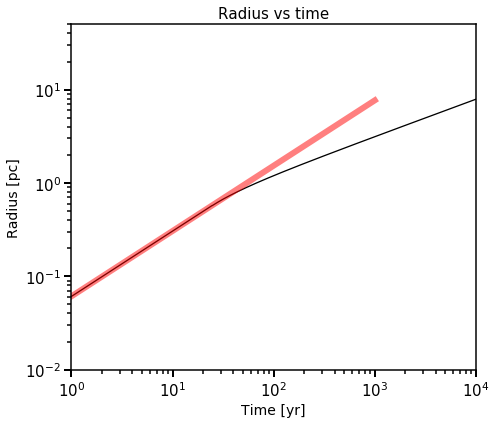

In [103]:
#~~~~~~~~~~~~Radius with Time~~~~~~~~~~~~#
n0 = 10.
e51 = 1.0
mej = 0.2
t = np.logspace(-5, 3, 1000)
rad_t = np.zeros(t.size)
for i, tsnap in enumerate(t):
    rad_t[i] = selfsim_rad_ED(n0=n0, mej=mej, e51=e51, t=tsnap)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

tim, rad, lum, vel = snrLC.lightcurve_Full(mej=mej, n0=n0, e51=e51, epse=1.0e-3, pp=2.2, sntype='ia')

plt.figure(figsize=(7,6))
plt.title('Radius vs time', fontsize=15)
plt.plot(tim, rad, 'k-')
plt.plot(t, rad_t, 'r-', lw=6.0, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time [yr]', fontsize=14)
plt.ylabel('Radius [pc]', fontsize=14)
plt.xlim(1.0, 1.0e4)
plt.ylim(0.01, 50.)
plt.show()

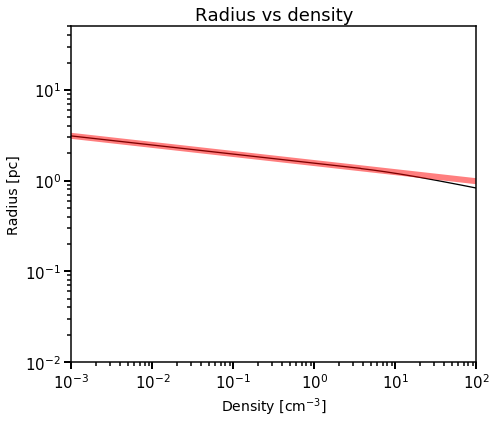

In [126]:
#~~~~~~~~~~~~Radius with Density~~~~~~~~~~~~#
e51 = 1.0
tsnap = 131
mej=1.0
densities = np.logspace(-3, 2, 1000)
rad_scal = np.zeros(densities.size)
rad_model = np.zeros(densities.size)
for i, n0 in enumerate(densities):
    rad_scal[i] = selfsim_rad_ED(n0=n0, mej=mej, e51=e51, t=tsnap)
    rad_model[i], lum, vel = snrLC.lightcurve(n0=n0, mej=mej, e51=e51, epse=1.0e-3, pp=2.2, tsnap=tsnap,\
                                        sntype='ia')
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.figure(figsize=(7,6))
plt.plot(densities, rad_model, 'k-')
plt.title('Radius vs density', fontsize=18)
plt.plot(densities, rad_scal, 'r-', lw=6.0, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Density [cm$^{-3}$]', fontsize=14)
plt.ylabel('Radius [pc]', fontsize=14)
plt.xlim(1.0e-3, 1.0e2)
plt.ylim(0.01, 50.)
plt.show()

At high densities, it bends away because SNRs already hit the Sedov phase, so the ED solution doesn't fit

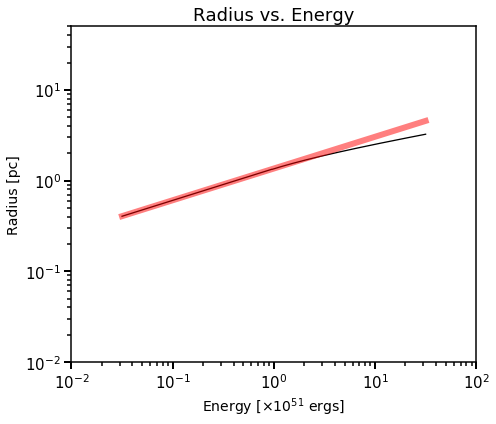

In [125]:
#~~~~~~~~~~~~Radius with Ejecta energy~~~~~~~~~~~~#
n0 = 4.0
mej=1.0
tsnap = 131
energies = np.logspace(-1.5, 1.5, 1000)
rad_scal = np.zeros(energies.size)
rad_model = np.zeros(energies.size)
for i, e51 in enumerate(energies):
    rad_scal[i] = selfsim_rad_ED(n0=n0, mej=mej, e51=e51, t=tsnap)
    rad_model[i], lum, vel = snrLC.lightcurve(n0=n0, mej=mej, e51=e51, epse=1.0e-3, pp=2.2, tsnap=tsnap,\
                                        sntype='ia')
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.figure(figsize=(7,6))
plt.plot(energies, rad_model, 'k-')
plt.title('Radius vs. Energy', fontsize=18)
plt.plot(energies, rad_scal, 'r-', lw=6.0, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Energy [$\times 10^{51}$ ergs]', fontsize=14)
plt.ylabel('Radius [pc]', fontsize=14)
plt.xlim(0.01, 100.)
plt.ylim(0.01, 50.)
plt.show()

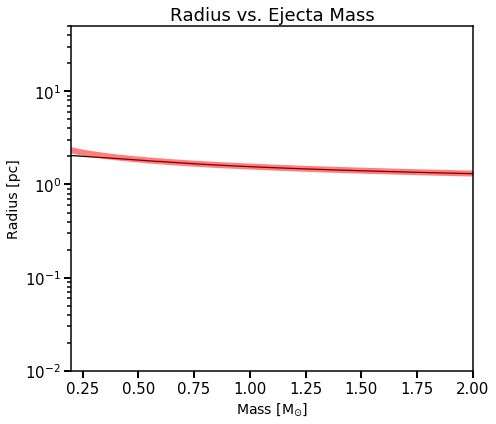

In [127]:
#~~~~~~~~~~~~Radius with Ejecta mass~~~~~~~~~~~~#
n0 = 1.0
e51 = 1.0
tsnap = 131
masses = np.linspace(0.2, 2.0, 1000)
rad_scal = np.zeros(masses.size)
rad_model = np.zeros(masses.size)
for i, mej in enumerate(masses):
    rad_scal[i] = selfsim_rad_ED(n0=n0, mej=mej, e51=e51, t=tsnap)
    rad_model[i], lum, vel = snrLC.lightcurve(n0=n0, mej=mej, e51=e51, epse=1.0e-3, pp=2.2, tsnap=tsnap,\
                                        sntype='ia')
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.figure(figsize=(7,6))
plt.plot(masses, rad_model, 'k-')
plt.title('Radius vs. Ejecta Mass', fontsize=18)
plt.plot(masses, rad_scal, 'r-', lw=6.0, alpha=0.5)
plt.yscale('log')
plt.xlabel(r'Mass [M$_{\odot}$]', fontsize=14)
plt.ylabel('Radius [pc]', fontsize=14)
plt.xlim(0.2, 2.)
plt.ylim(0.01, 50.)
plt.show()

Again, it bends away at low-ejecta masses because it reaches the Sedov stage. Remember $t_{sed} \propto M_{ej}^{5/6} n_0^{-1/3}$

## Check Velocity  Scalings

$v_s = \left(8797 \rm{km/s}\right) t_2^{-0.3} n_0^{-0.1} E_{51}^{0.35} M_{ej}^{-0.25}, $

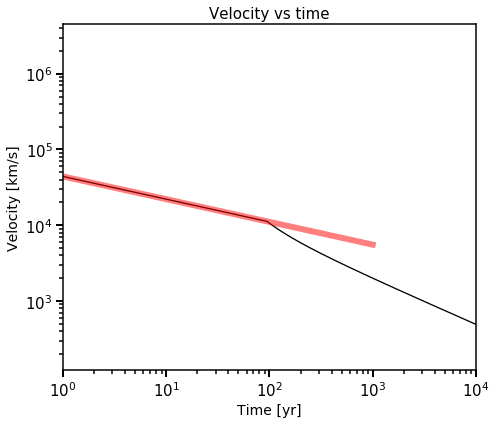

In [129]:
#~~~~~~~~~~~~Velocity with Time~~~~~~~~~~~~#
n0 = 1.
e51 = 1.0
mej = 0.4
t = np.logspace(-5, 3, 1000)
vel_t = np.zeros(t.size)
for i, tsnap in enumerate(t):
    vel_t[i] = selfsim_vel_ED(n0=n0, mej=mej, e51=e51, t=tsnap)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

tim, rad, lum, vel = snrLC.lightcurve_Full(mej=mej, n0=n0, e51=e51, epse=1.0e-3, pp=2.2, sntype='ia')

plt.figure(figsize=(7,6))
plt.title('Velocity vs time', fontsize=15)
plt.plot(tim, vel, 'k-')
plt.plot(t, vel_t, 'r-', lw=6.0, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time [yr]', fontsize=14)
plt.ylabel('Velocity [km/s]', fontsize=14)
plt.xlim(1.0, 1.0e4)
#plt.ylim(0.01, 50.)
plt.show()

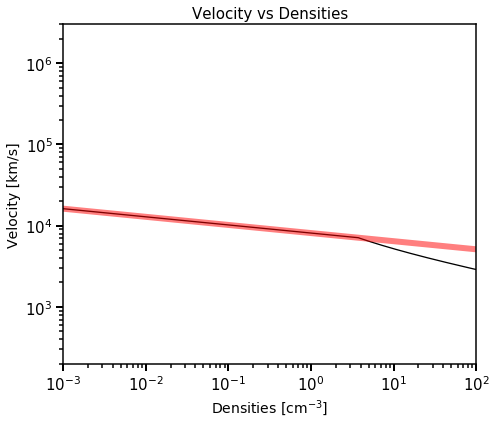

In [120]:
#~~~~~~~~~~~~Velocity with Densities~~~~~~~~~~~~#
e51 = 1.0
mej = 1.
tsnap = 131.
densities = np.logspace(-3, 2, 1000)
vel_scal = np.zeros(densities.size)
vel_model = np.zeros(densities.size)
for i, n0 in enumerate(densities):
    vel_scal[i] = selfsim_vel_ED(n0=n0, mej=mej, e51=e51, t=tsnap)
    rad, lum, vel_model[i] = snrLC.lightcurve(n0=n0, mej=mej, e51=e51, epse=1.0e-3, pp=2.2, tsnap=tsnap,\
                                        sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.figure(figsize=(7,6))
plt.title('Velocity vs Densities', fontsize=15)
plt.plot(densities, vel_model, 'k-')
plt.plot(densities, vel_scal, 'r-', lw=6.0, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Densities [cm$^{-3}$]', fontsize=14)
plt.ylabel('Velocity [km/s]', fontsize=14)
plt.xlim(1.0e-3, 1.0e2)
plt.ylim(200., 3.0e6)
plt.show()

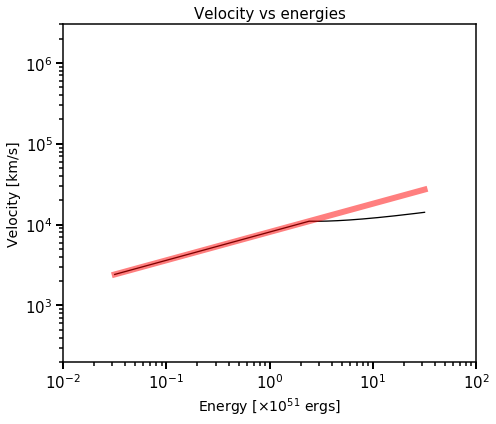

In [121]:
#~~~~~~~~~~~~Velocity with Energies~~~~~~~~~~~~#
n0=1.0
mej = 1.
tsnap = 131.
energies = np.logspace(-1.5, 1.5, 1000)
vel_scal = np.zeros(energies.size)
vel_model = np.zeros(energies.size)
for i, e51 in enumerate(energies):
    vel_scal[i] = selfsim_vel_ED(n0=n0, mej=mej, e51=e51, t=tsnap)
    rad, lum, vel_model[i] = snrLC.lightcurve(n0=n0, mej=mej, e51=e51, epse=1.0e-3, pp=2.2, tsnap=tsnap,\
                                        sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.figure(figsize=(7,6))
plt.title('Velocity vs energies', fontsize=15)
plt.plot(energies, vel_model, 'k-')
plt.plot(energies, vel_scal, 'r-', lw=6.0, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Energy [$\times 10^{51}$ ergs]', fontsize=14)
plt.ylabel('Velocity [km/s]', fontsize=14)
plt.xlim(0.01, 1.0e2)
plt.ylim(200., 3.0e6)
plt.show()

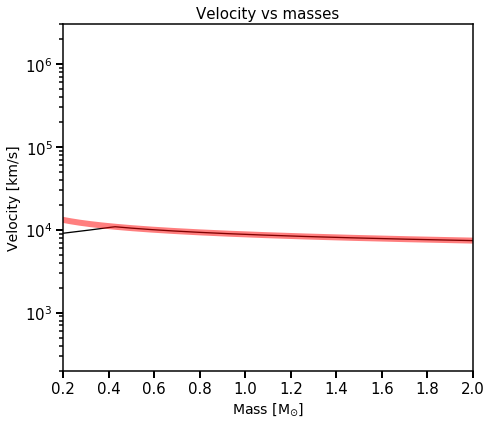

In [131]:
#~~~~~~~~~~~~Velocity with Ejecta Masses~~~~~~~~~~~~#
n0=1.0
e51=1.0
tsnap = 100.
masses = np.linspace(0.2, 2.0, 1000)
vel_scal = np.zeros(masses.size)
vel_model = np.zeros(masses.size)
for i, mej in enumerate(masses):
    vel_scal[i] = selfsim_vel_ED(n0=n0, mej=mej, e51=e51, t=tsnap)
    rad, lum, vel_model[i] = snrLC.lightcurve(n0=n0, mej=mej, e51=e51, epse=1.0e-3, pp=2.2, tsnap=tsnap,\
                                        sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.figure(figsize=(7,6))
plt.title('Velocity vs masses', fontsize=15)
plt.plot(masses, vel_model, 'k-')
plt.plot(masses, vel_scal, 'r-', lw=6.0, alpha=0.5)
plt.yscale('log')
plt.xlabel(r'Mass [M$_{\odot}$]', fontsize=14)
plt.ylabel('Velocity [km/s]', fontsize=14)
plt.xlim(0.2, 2.0)
plt.ylim(200., 3.0e6)
plt.show()

## Check Luminosity Scaling

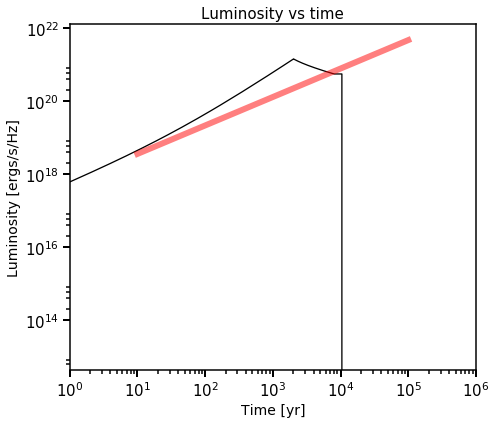

In [233]:
reload(snrLC)
#~~~~~~~~~~~~Velocity with Time~~~~~~~~~~~~#
n0 = 1.
e51 = 0.01
mej = 1.0
freq=1.4e9
t = np.logspace(1, 5, 1000)
lum_t = np.zeros(t.size)
for i, tsnap in enumerate(t):
    lum_t[i] = selfsim_lum_ED(n0=n0, mej=mej, e51=e51, freq=freq, t=tsnap)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

tim1, rad1, lum1, vel = snrLC.lightcurve_Full(mej=mej, n0=n0, e51=e51, epse=1.0e-3, pp=2.2, freq=freq, sntype='ia')

plt.figure(figsize=(7,6))
plt.title('Luminosity vs time', fontsize=15)
plt.plot(tim1, lum1, 'k-')
plt.plot(t, lum_t, 'r-', lw=6.0, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time [yr]', fontsize=14)
plt.ylabel('Luminosity [ergs/s/Hz]', fontsize=14)
plt.xlim(1.0, 1.0e6)
#plt.ylim(0.01, 50.)
plt.show()

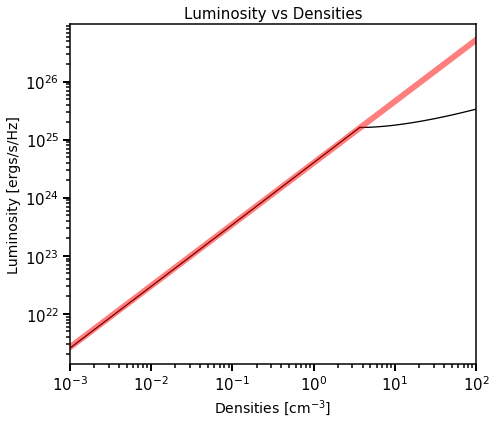

In [221]:
#~~~~~~~~~~~~Velocity with Densities~~~~~~~~~~~~#
e51 = 1.0
mej = 1.
tsnap = 131.
freq=1.4e9
densities = np.logspace(-3, 2, 1000)
lum_scal = np.zeros(densities.size)
lum_model = np.zeros(densities.size)
for i, n0 in enumerate(densities):
    lum_scal[i] = selfsim_lum_ED(n0=n0, mej=mej, e51=e51, freq=freq, t=tsnap)
    rad, lum_model[i], vel = snrLC.lightcurve(n0=n0, mej=mej, e51=e51, epse=1.0e-3, freq=freq, pp=2.2, tsnap=tsnap,\
                                        sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.figure(figsize=(7,6))
plt.title('Luminosity vs Densities', fontsize=15)
plt.plot(densities, lum_model, 'k-')
plt.plot(densities, lum_scal, 'r-', lw=6.0, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Densities [cm$^{-3}$]', fontsize=14)
plt.ylabel('Luminosity [ergs/s/Hz]', fontsize=14)
plt.xlim(1.0e-3, 1.0e2)
#plt.ylim(200., 3.0e6)
plt.show()

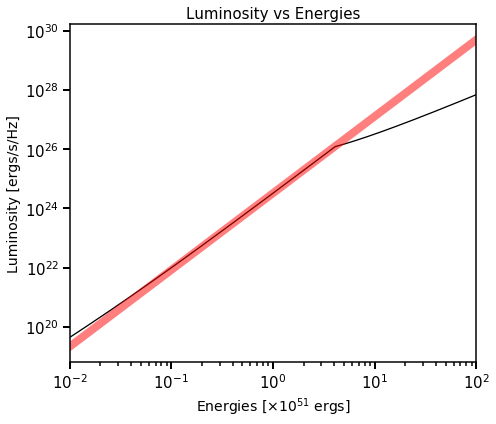

In [222]:
#~~~~~~~~~~~~Luminosity with Energies~~~~~~~~~~~~#
n0=1.0
mej = 1.
tsnap = 100.
freq=1.4e9
energies = np.logspace(-2, 2, 1000)
lum_scal = np.zeros(energies.size)
lum_model = np.zeros(energies.size)
for i, e51 in enumerate(energies):
    lum_scal[i] = selfsim_lum_ED(n0=n0, mej=mej, e51=e51, freq=freq, epse=1.0e-3, pp=2.2, t=tsnap)
    rad, lum_model[i], vel = snrLC.lightcurve(n0=n0, mej=mej, e51=e51, epse=1.0e-3, freq=freq, pp=2.2, tsnap=tsnap,\
                                        sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.figure(figsize=(7,6))
plt.title('Luminosity vs Energies', fontsize=15)
plt.plot(energies, lum_model, 'k-')
plt.plot(energies, lum_scal, 'r-', lw=8.0, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energies [$\\times10^{51}$ ergs]', fontsize=14)
plt.ylabel('Luminosity [ergs/s/Hz]', fontsize=14)
plt.xlim(1.0e-2, 100)
#plt.ylim(200., 3.0e6)
plt.show()

**Why does Sedov transition happen at different times, but same radii, for different energies?**

Whats interesting is that - in your paper - the Sedov transition for a given density and ejecta mass will happen at the same radius, even for different kinetic energies. Two ways to verify this :-

1) $t_{ST} \sim E^{-1/2}$ and $R \sim t^{0.7} E^{0.35}$. So substituting $t = t_{ST}$ cancels out the E-dependence

2) The characteristic scale for radius, $R_{ch}$ defined in Truelove & Mckee 1999 is also independent of energy (Eq. 1)

But that ofcourse does not mean the Sedov transition will always happen at the same radius, because the transition radius still depends on ejecta mass and ISM density, i.e. $R_{ST} \sim M_{ej}^{1/3} n_0^{-1/3}$ I don't exactly know how to interpret the physics of this, though. Will need to look a little deeper in the TM99 paper.

**Why is there a small error at very low energies?**

Don't know. I checked by making spectra optically thin at all times, and setting $\gamma$=1 at all times, but nothing. I checked the algebra. It's pretty clearly $E^{2.59}$ - I checked several times. The relation between luminosity and ejecta energy is also very slightly curved - not fully a straight line in log-space. Something somewhere is introducing some non-linearity...

**UPDATE**: Its because of the $\epsilon_b \sim \left( \frac{v_s}{c} + \frac{1}{M_A}\right)$ term. If instead in `snrLC`, I wrote $\epsilon_b \sim v_s/c$ for all times, and remove the $B>4B_0$ restriction, the scaling relations work out as given. So clearly, for high energies, the first term in $\epsilon_b$ dominates, but at low energies, both resonant and non-resonant instabilities dominate. Whether this is physically accurate and consistent with simulations is something we should check later with Damiano. But this is probably a motivation to **NOT** write a scaling relation for luminosity in the paper and instead just upload readers to your code. I think. 

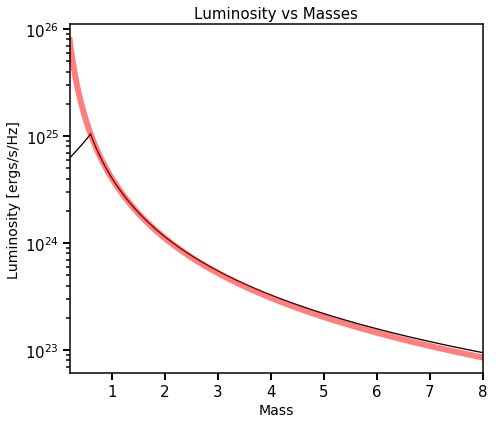

In [223]:
#~~~~~~~~~~~~Luminosity with Masses~~~~~~~~~~~~#
e51 = 1.0
n0=1.0
tsnap = 131.
freq=1.4e9
masses = np.linspace(0.2, 8.0, 1000)
lum_scal = np.zeros(masses.size)
lum_model = np.zeros(masses.size)
for i, mej in enumerate(masses):
    lum_scal[i] = selfsim_lum_ED(n0=n0, mej=mej, e51=e51, freq=freq, epse=1.0e-3, pp=2.2, t=tsnap)
    rad, lum_model[i], vel = snrLC.lightcurve(n0=n0, mej=mej, e51=e51, epse=1.0e-3, freq=freq, pp=2.2, tsnap=tsnap,\
                                        sntype='ia')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

plt.figure(figsize=(7,6))
plt.title('Luminosity vs Masses', fontsize=15)
plt.plot(masses, lum_model, 'k-')
plt.plot(masses, lum_scal, 'r-', lw=6.0, alpha=0.5)
plt.yscale('log')
plt.xlabel('Mass', fontsize=14)
plt.ylabel('Luminosity [ergs/s/Hz]', fontsize=14)
plt.xlim(0.2,8.0)
#plt.ylim(200., 3.0e6)
plt.show()

**NOTE**: Read the above explanation about why the small error in the scaling relation.

## Radius - Ejecta Dominated to Sedov transition

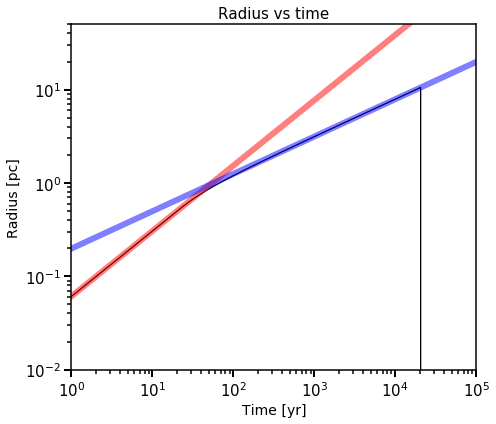

In [154]:
#~~~~~~~~~~~~Radius with Time~~~~~~~~~~~~#
n0 = 10.
e51 = 1.0
mej = 0.2
t = np.logspace(-5, 5, 1000)
rad_t = np.zeros(t.size)
rad_st = np.zeros(t.size)
for i, tsnap in enumerate(t):
    rad_t[i] = selfsim_rad_ED(n0=n0, mej=mej, e51=e51, t=tsnap)
    rad_st[i] = selfsim_rad_ST(n0=n0, e51=e51, t=tsnap)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

tim, rad, lum, vel = snrLC.lightcurve_Full(mej=mej, n0=n0, e51=e51, epse=1.0e-3, pp=2.2, sntype='ia')

plt.figure(figsize=(7,6))
plt.title('Radius vs time', fontsize=15)
plt.plot(tim, rad, 'k-')
plt.plot(t, rad_t, 'r-', lw=6.0, alpha=0.5)
plt.plot(t, rad_st, 'b-', lw=6.0, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time [yr]', fontsize=14)
plt.ylabel('Radius [pc]', fontsize=14)
plt.xlim(1.0, 1.0e5)
plt.ylim(0.01, 50.)
plt.show()

Check $\epsilon_b$ and $\gamma$ with energies